# Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve

# Loading Data

In [2]:
df = pd.read_csv('./loan_data.csv')
df = df.drop(columns=["Loan_ID"])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


# EDA

In [3]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [5]:
df.dropna(inplace=True)

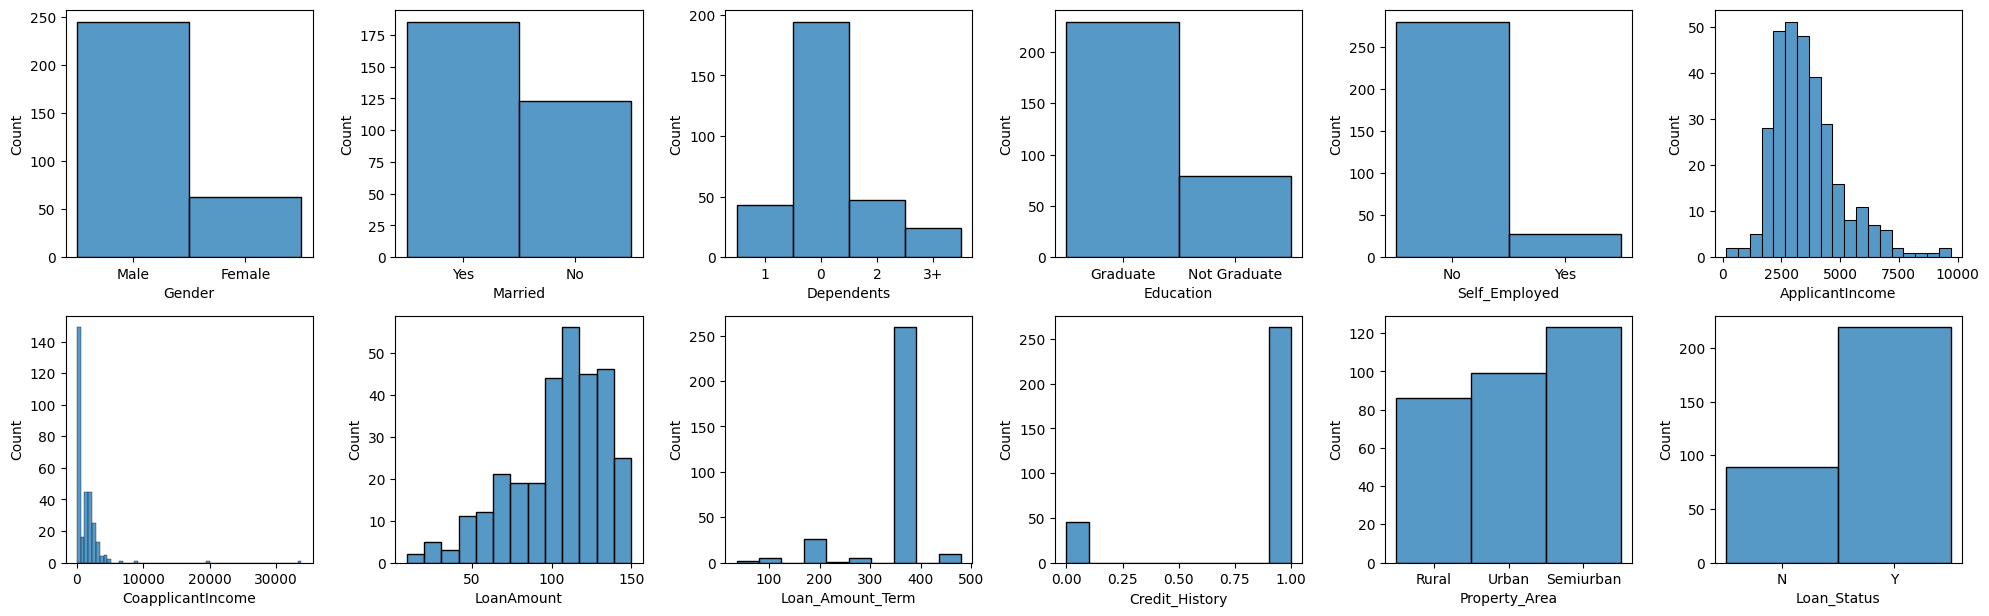

In [6]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# MODELING

### Preprocessing

In [7]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in x.columns:
    x[col] = label_encoder.fit_transform(x[col])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,209,42,74,7,1,0
1,1,1,0,0,1,98,0,23,7,1,2
2,1,1,0,1,0,66,108,66,7,1,2
3,1,0,0,0,0,245,0,87,7,1,2
4,1,1,0,1,0,49,43,41,7,1,2


In [9]:
y.unique()

array(['N', 'Y'], dtype=object)

In [10]:
mapper_loan={'N':0,'Y':1}
y=y.map(mapper_loan)
y.head() 

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [11]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state =42)

In [12]:
print("x_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (246, 11)
y_train shape =  (246,)
x_test shape =  (62, 11)
y_test shape =  (62,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Comparison

Model without PCA:
Training time: 0.4732 seconds
Prediction time: 0.0251 seconds
AUC-ROC score: 0.7863

Model with PCA:
Training time: 0.4669 seconds
Prediction time: 0.0250 seconds
AUC-ROC score: 0.8238


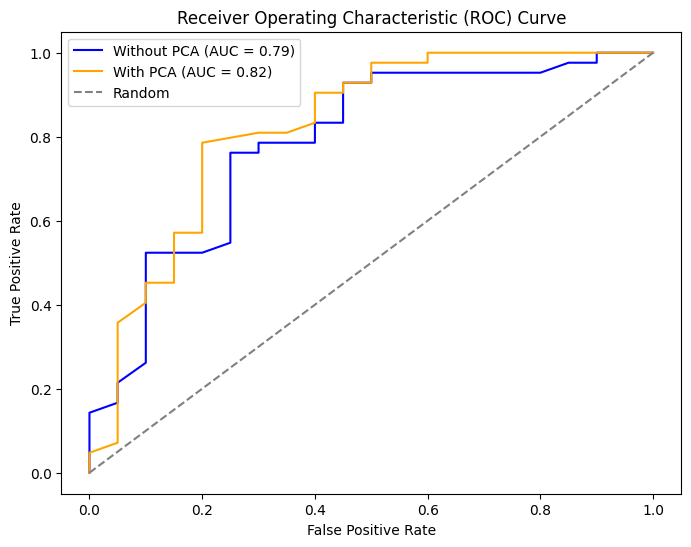

In [14]:
# Without PCA
start_time_no_pca_train = time.time()
random_forest_no_pca = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_no_pca.fit(X_train, y_train)
end_time_no_pca_train = time.time()

start_time_no_pca_predict = time.time()
y_prob_no_pca = random_forest_no_pca.predict_proba(X_test)[:, 1]
end_time_no_pca_predict = time.time()

train_time_no_pca = end_time_no_pca_train - start_time_no_pca_train
predict_time_no_pca = end_time_no_pca_predict - start_time_no_pca_predict

roc_auc_no_pca = roc_auc_score(y_test, y_prob_no_pca)
fpr_no_pca, tpr_no_pca, _ = roc_curve(y_test, y_prob_no_pca)

print(f"Model without PCA:")
print(f"Training time: {train_time_no_pca:.4f} seconds")
print(f"Prediction time: {predict_time_no_pca:.4f} seconds")
print(f"AUC-ROC score: {roc_auc_no_pca:.4f}")

# With PCA
n_components = 11
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start_time_with_pca_train = time.time()
random_forest_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_with_pca.fit(X_train_pca, y_train)
end_time_with_pca_train = time.time()

start_time_with_pca_predict = time.time()
y_prob_with_pca = random_forest_with_pca.predict_proba(X_test_pca)[:, 1]
end_time_with_pca_predict = time.time()

train_time_with_pca = end_time_with_pca_train - start_time_with_pca_train
predict_time_with_pca = end_time_with_pca_predict - start_time_with_pca_predict

roc_auc_with_pca = roc_auc_score(y_test, y_prob_with_pca)
fpr_with_pca, tpr_with_pca, _ = roc_curve(y_test, y_prob_with_pca)

print(f"\nModel with PCA:")
print(f"Training time: {train_time_with_pca:.4f} seconds")
print(f"Prediction time: {predict_time_with_pca:.4f} seconds")
print(f"AUC-ROC score: {roc_auc_with_pca:.4f}")

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_no_pca, tpr_no_pca, label='Without PCA (AUC = {:.2f})'.format(roc_auc_no_pca), color='blue')
plt.plot(fpr_with_pca, tpr_with_pca, label='With PCA (AUC = {:.2f})'.format(roc_auc_with_pca), color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
